In [2]:
import scanpy as sc, anndata as ad, numpy as np, pandas as pd, seaborn as sb

#sc.logging.print_header()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

col_patient_groups=['#deebf7','#9ecae1','#4292c6','#addd8e','#d8daeb','#9e9ac8','#54278f','#66bd63']

In [3]:
sc.settings.set_figure_params(dpi=80)

In [4]:
#-- -colors for DCs
col_ids =['tomato','paleturquoise','cornflowerblue','mediumseagreen','mediumpurple',
          'goldenrod','lightgreen','palevioletred','lightsalmon','thistle', #0-9
          "brown","plum","lightskyblue","yellowgreen","mediumorchid","mediumturquoise","peru",
          "#bf812d","mediumaquamarine","lightslategrey","dodgerblue","#4daf4a",'#377eb8']

col_groups=["#66c2a4","#9e9ac8"]

# 1- Read concatenated data 

In [5]:
pbmc_concat=sc.read('./H5AD/paCov_Tsang_BC_05292021.h5ad')
pbmc_concat

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

# 2- Check for batch effets (Before Correction; BC)

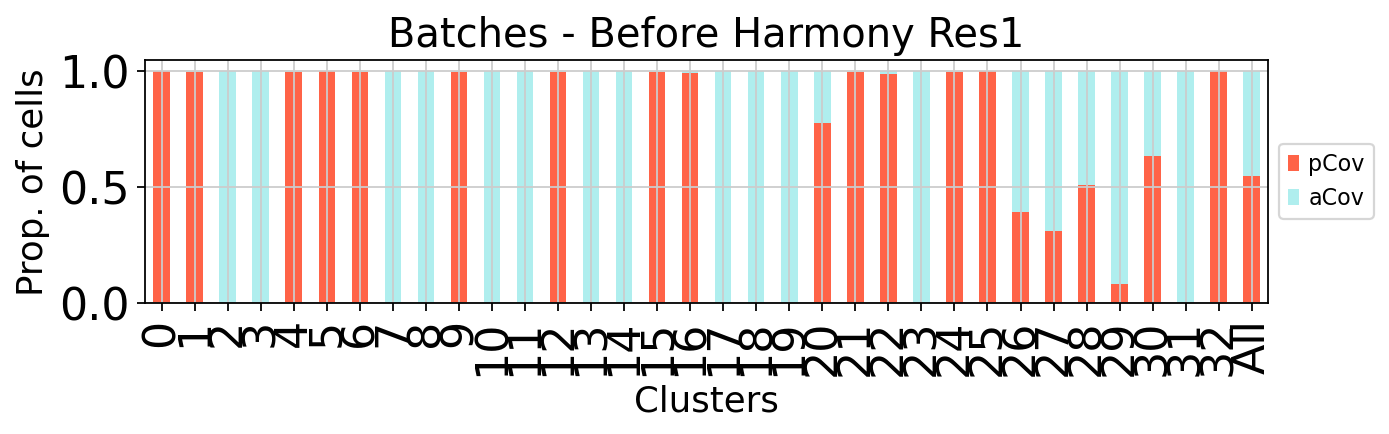

In [6]:
#-- proportion table
Groups_tab = pd.crosstab(index=pbmc_concat.obs['Res1_2_BC'],  # Make a crosstab
                        columns=pbmc_concat.obs['Concat_batch'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Batches - Before Harmony Res1", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=16)
plt.xlabel("Clusters", fontsize=16)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

In [7]:
pbmc_concat

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

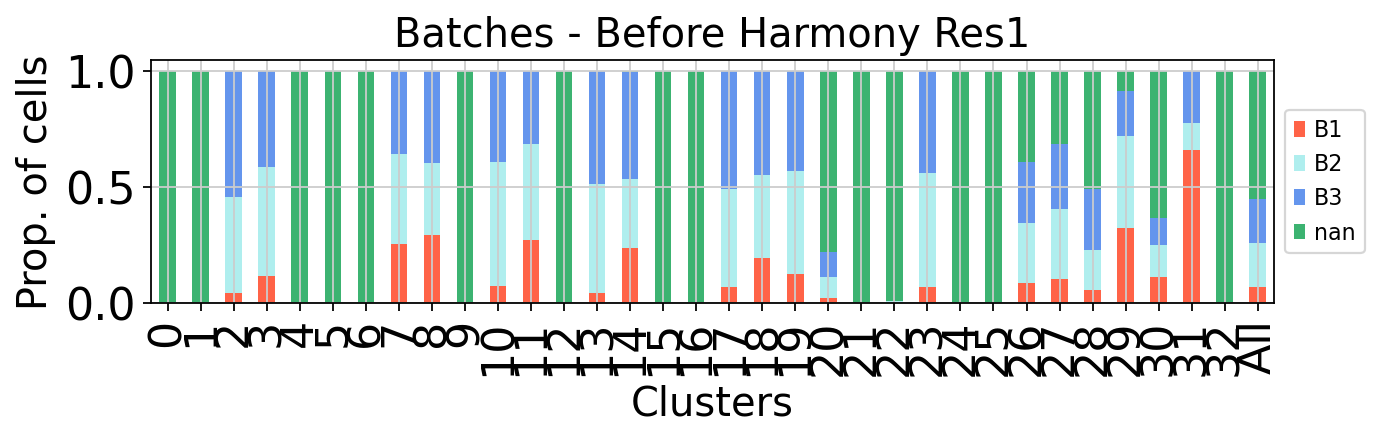

In [8]:
#-- proportion table
Groups_tab = pd.crosstab(index=pbmc_concat.obs['Res1_2_BC'],  # Make a crosstab
                        columns=pbmc_concat.obs['Batch'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Batches - Before Harmony Res1", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

# HARMONY BATCH CORRECTION --------------------------------

In [5]:
import numpy as np, pandas as pd, scanpy as sc, seaborn as sb
import scanpy as sc, anndata as ad, numpy as np, pandas as pd, seaborn as sb

sc.logging.print_versions()
#sc.logging.print_header()

from matplotlib import rcParams

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')  

scanpy==1.5.1 anndata==0.7.4 umap==0.4.6 numpy==1.19.1 scipy==1.5.0 pandas==1.1.0 scikit-learn==0.23.1 statsmodels==0.11.1 python-igraph==0.8.2 louvain==0.7.0 leidenalg==0.8.1


In [6]:
#-- set R HOME 
import os
os.environ['R_HOME'] = '/home/nehard/anaconda3/envs/loompy/lib/R'

In [7]:
#---HARMONY BATCH CORRECTION

%load_ext rpy2.ipython
import rpy2
import rpy2.rinterface_lib.callbacks
import logging
from rpy2.robjects import pandas2ri
import anndata2ri


In [8]:
# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [9]:
%%R #-o test
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))


In [10]:
pbmc_concat=sc.read('./H5AD/paCov_Tsang_BC_05292021.h5ad')
pbmc_concat


AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

In [11]:
meta_SC = pd.read_csv('./pCov_Tsang_concat_BC_06032021.csv', index_col=0)
meta_SC.head()

IDs_all celltype_concat       Names Fig_ids Groups  \
ACTTATCGTTCCGCGA-1_pCov  JB19050            HSCs  HPIR_021_1    pHC1    pHC   
CCTCATGAGGCAATGC-1_pCov  JB19050             Mgk  HPIR_021_1    pHC1    pHC   
CTCATCGGTACAGAAT-1_pCov  JB19050             Mgk  HPIR_021_1    pHC1    pHC   
GAGTGAGAGTAAACGT-1_pCov  JB19050            HSCs  HPIR_021_1    pHC1    pHC   
GCACGTGAGGAAGTGA-1_pCov  JB19050             Mgk  HPIR_021_1    pHC1    pHC   

                        Gender  Age_Months Patient_groups  Age_years  \
ACTTATCGTTCCGCGA-1_pCov      F        2.17            pHC       0.18   
CCTCATGAGGCAATGC-1_pCov      F        2.17            pHC       0.18   
CTCATCGGTACAGAAT-1_pCov      F        2.17            pHC       0.18   
GAGTGAGAGTAAACGT-1_pCov      F        2.17            pHC       0.18   
GCACGTGAGGAAGTGA-1_pCov      F        2.17            pHC       0.18   

                        age_groups  
ACTTATCGTTCCGCGA-1_pCov    infants  
CCTCATGAGGCAATGC-1_pCov    infants  
CTCATCGGTACAGAAT-1_pCov    infants  
GAGTGAGAGTAAACGT-1_pCov    infants  
GCACGTGAGGAAGTGA-1_pCov    infants

In [12]:
pbmc_concat.obs['IDs_all']= meta_SC['IDs_all']
pbmc_concat.obs['celltype_concat']= meta_SC['celltype_concat']
pbmc_concat.obs['Names']= meta_SC['Names']
pbmc_concat.obs['Fig_ids']= meta_SC['Fig_ids']
pbmc_concat.obs['Groups']= meta_SC['Groups']
pbmc_concat.obs['Gender']= meta_SC['Gender']
pbmc_concat.obs['Age_Months']= meta_SC['Age_Months']
pbmc_concat.obs['Patient_groups']= meta_SC['Patient_groups']
pbmc_concat.obs['Age_years']= meta_SC['Age_years']
pbmc_concat.obs['age_groups']= meta_SC['age_groups']


In [13]:
pbmc_concat.obs['age_groups'].value_counts()

infants    246035
adults     202269
Name: age_groups, dtype: int64

# Harmony Batch correction

In [14]:
pca = pbmc_concat.obsm['X_pca']
batch = pbmc_concat.obs

In [15]:
%%R -i pca -i batch -o hem
suppressPackageStartupMessages(library(harmony))
suppressPackageStartupMessages(library(magrittr))

t1 = Sys.time()
#hem <- HarmonyMatrix(pca, batch, theta=4, do_pca=F)
hem <- HarmonyMatrix(pca,
                     batch,
                     c('age_groups','Batch'), do_pca=FALSE)
t2 = Sys.time()

hem = data.frame(hem)

t2-t1

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write t

[1] 56.25673


In [16]:
sc.settings.verbosity = 3

har_corrected=pbmc_concat.copy()
har_corrected.obsm['X_pca'] = hem.values

In [17]:
sc.pp.neighbors(har_corrected, n_neighbors=10, n_pcs=40) #parallel=False

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:08:19)


In [18]:
sc.tl.umap(har_corrected, n_components=3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:10:36)


In [19]:
har_corrected

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

# Resolution = 1

In [20]:
sc.tl.leiden(har_corrected, resolution=1.2, key_added='Res1_2_Harm')

running Leiden clustering
    finished: found 31 clusters and added
    'Res1_2_Harm', the cluster labels (adata.obs, categorical) (0:13:47)


# Resolution = 1.2

In [21]:
sc.tl.leiden(har_corrected, resolution=1, key_added='Res1_Harm')

running Leiden clustering
    finished: found 28 clusters and added
    'Res1_Harm', the cluster labels (adata.obs, categorical) (0:16:03)


In [23]:
har_corrected.uns['Res1_2_Harm_colors']=col_ids
har_corrected.uns['Res1_Harm_colors']=col_ids

/home/nehard/anaconda3/envs/Hnunu/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


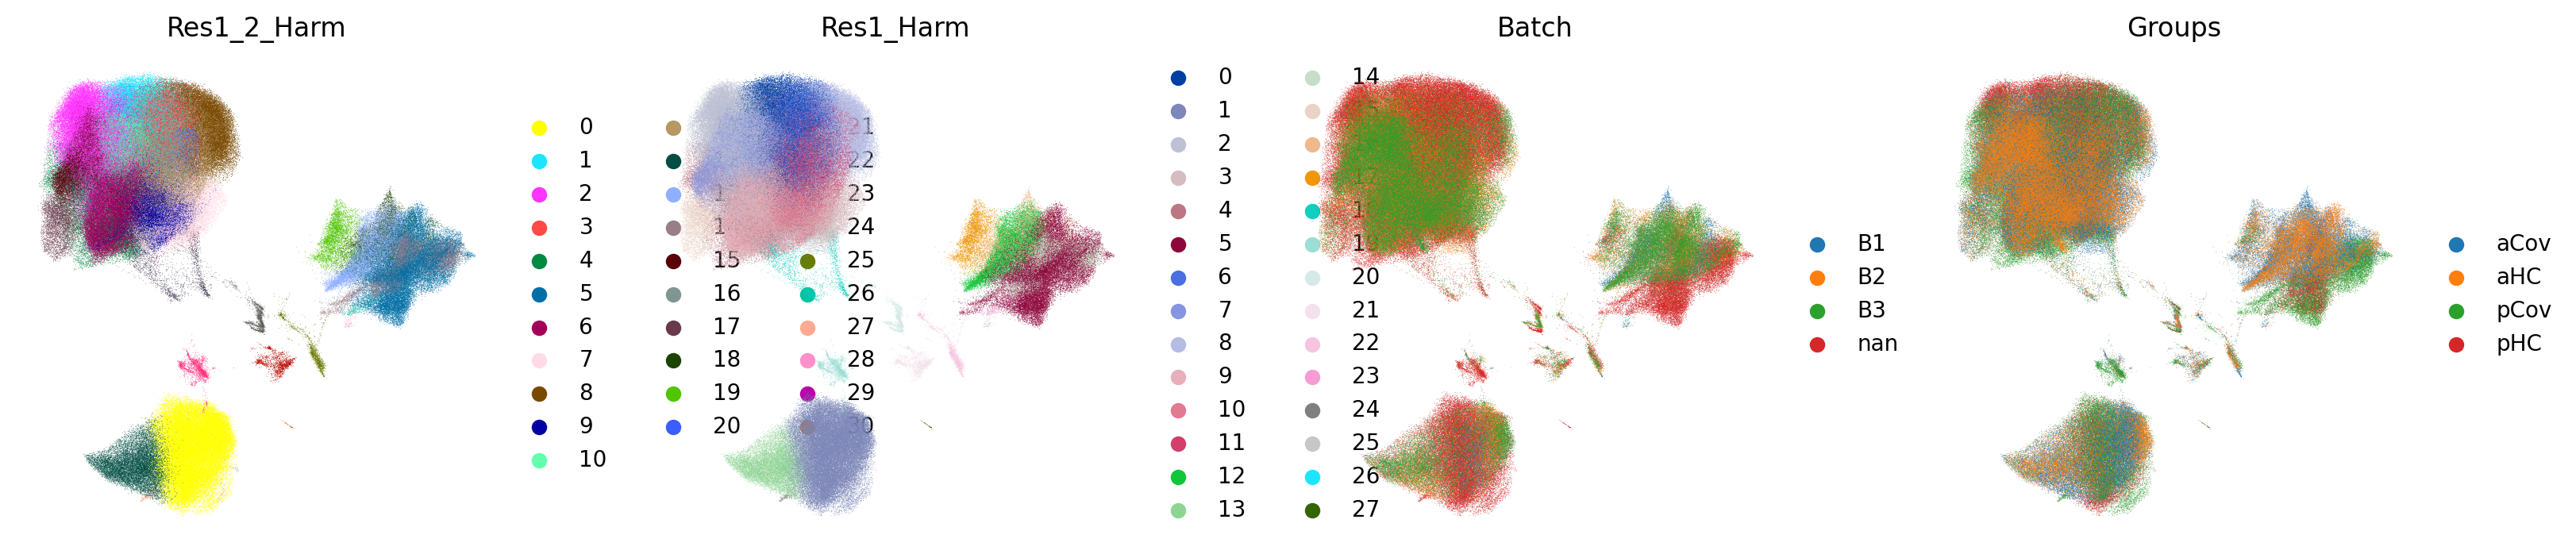

In [24]:
matplotlib.style.use('default')   
rcParams['figure.figsize'] = (4,4)

genes=['Res1_2_Harm',"Res1_Harm",'Batch','Groups']

sc.pl.umap(har_corrected, 
           color=genes,
           size=0.3, 
           color_map='OrRd',
           ncols=4,
           frameon=False)

In [25]:
har_corrected

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

# Res =1 

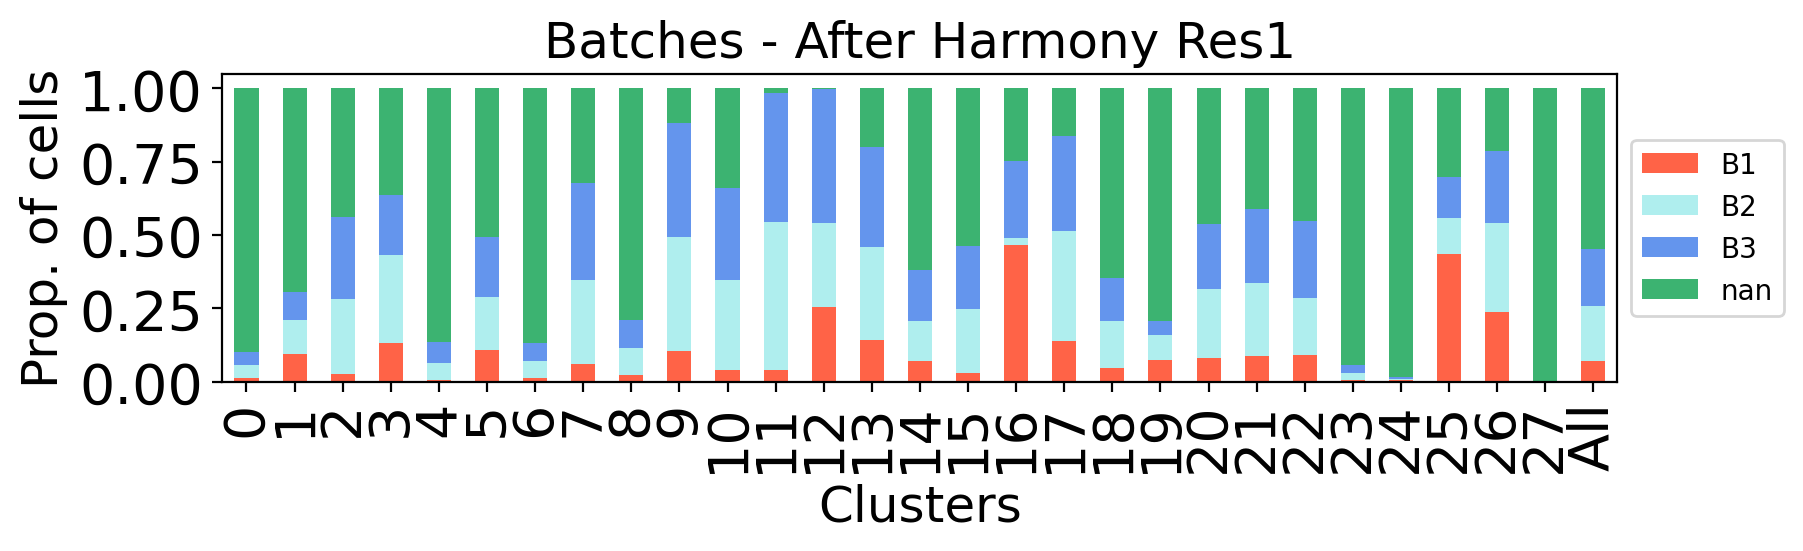

In [26]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Batch'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Batches - After Harmony Res1", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

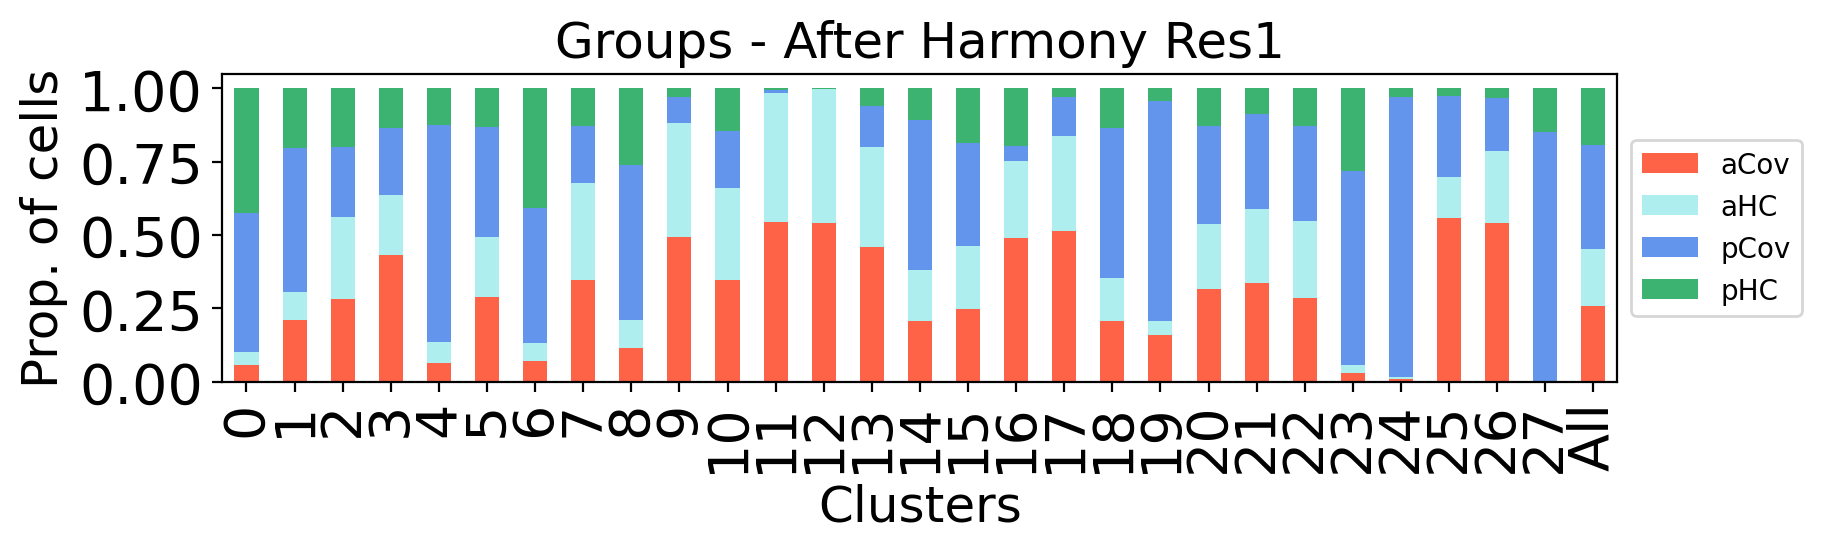

In [15]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Groups'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Groups - After Harmony Res1", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

In [16]:
col_patient_groups=['#deebf7','#9ecae1','#4292c6','#addd8e','#d8daeb','#9e9ac8','#54278f','#66bd63']

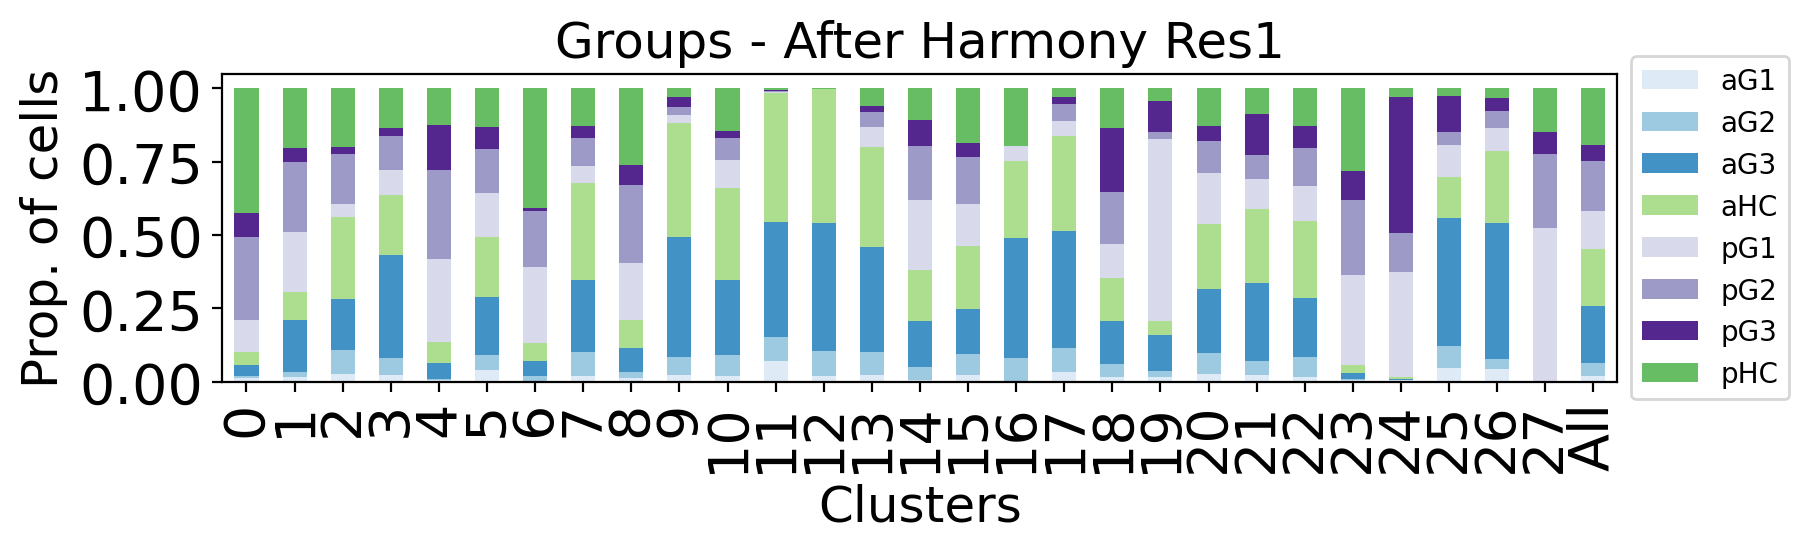

In [18]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Patient_groups'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_patient_groups)


plt.title("Groups - After Harmony Res1", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

In [5]:
har_corrected=sc.read('./H5AD/paCov_Tsang_harm_V2_06032021.h5ad')
har_corrected

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

/home/nehard/anaconda3/envs/scanpy1_6/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


categories: 0, 1, 2, etc.
var_group_labels: Mgk, Mono, DCs, etc.


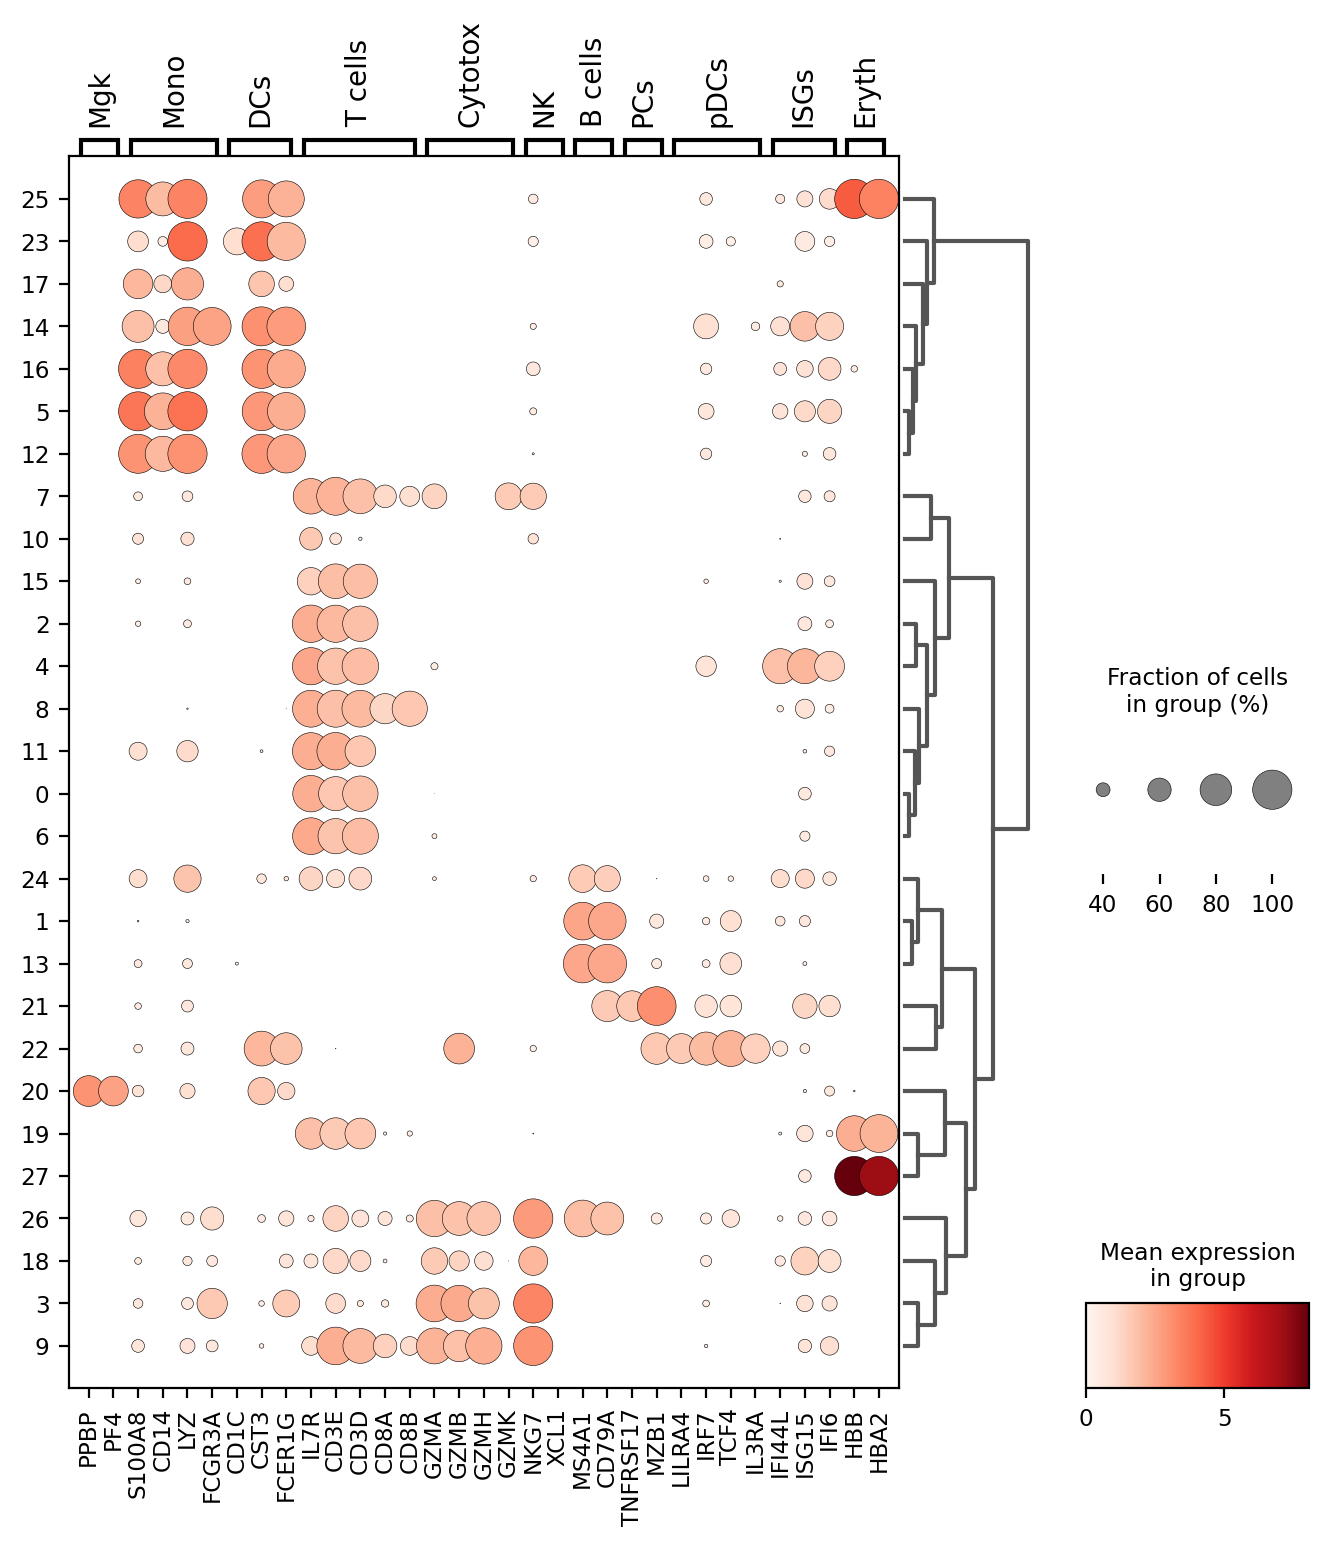

In [6]:
sc.settings.set_figure_params(dpi=300)  # set sufficiently high resolution for saving

Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK", #14-17
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #"IGHM","IGHD", #20-21
        "TNFRSF17", "MZB1",#'JCHAIN',#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", # 24-27
        'IFI44L','ISG15','IFI6', #28-30
        'HBB','HBA2'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(har_corrected, 
                   Genes, 
                   'Res1_Harm', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(8,8),
                    dot_max=1, 
                   dot_min=0.2) #, save='_Fig1c.pdf'
                    #,key='rank_genes_groups_filtered'

# Res = 1.2

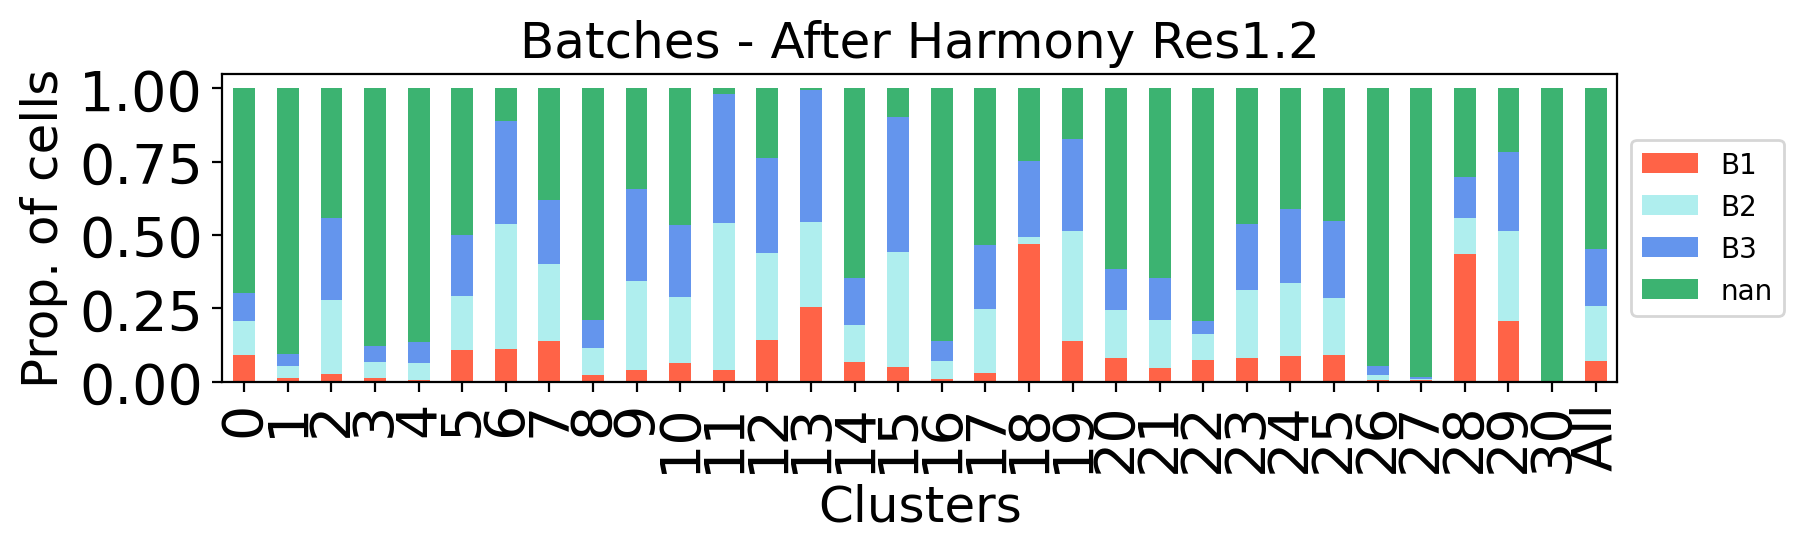

In [7]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_2_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Batch'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Batches - After Harmony Res1.2", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

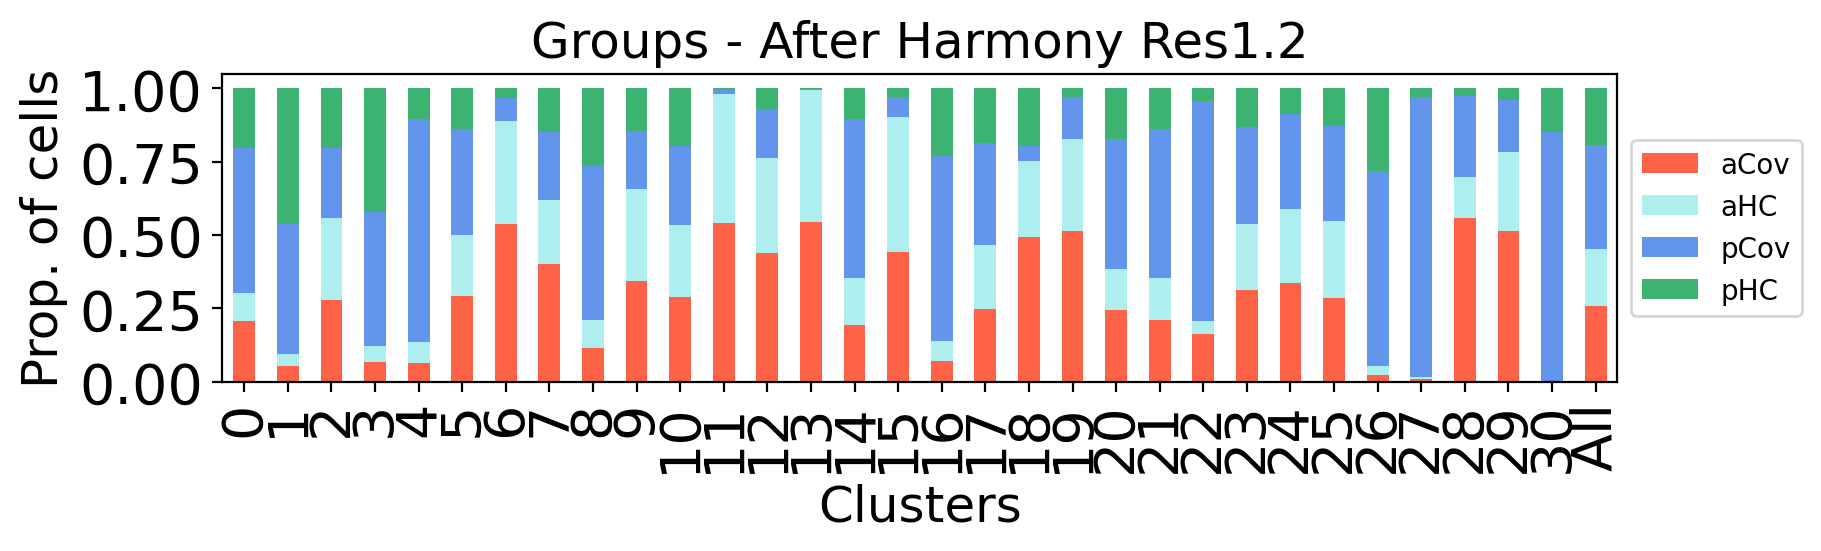

In [8]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_2_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Groups'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_ids)


plt.title("Groups - After Harmony Res1.2", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

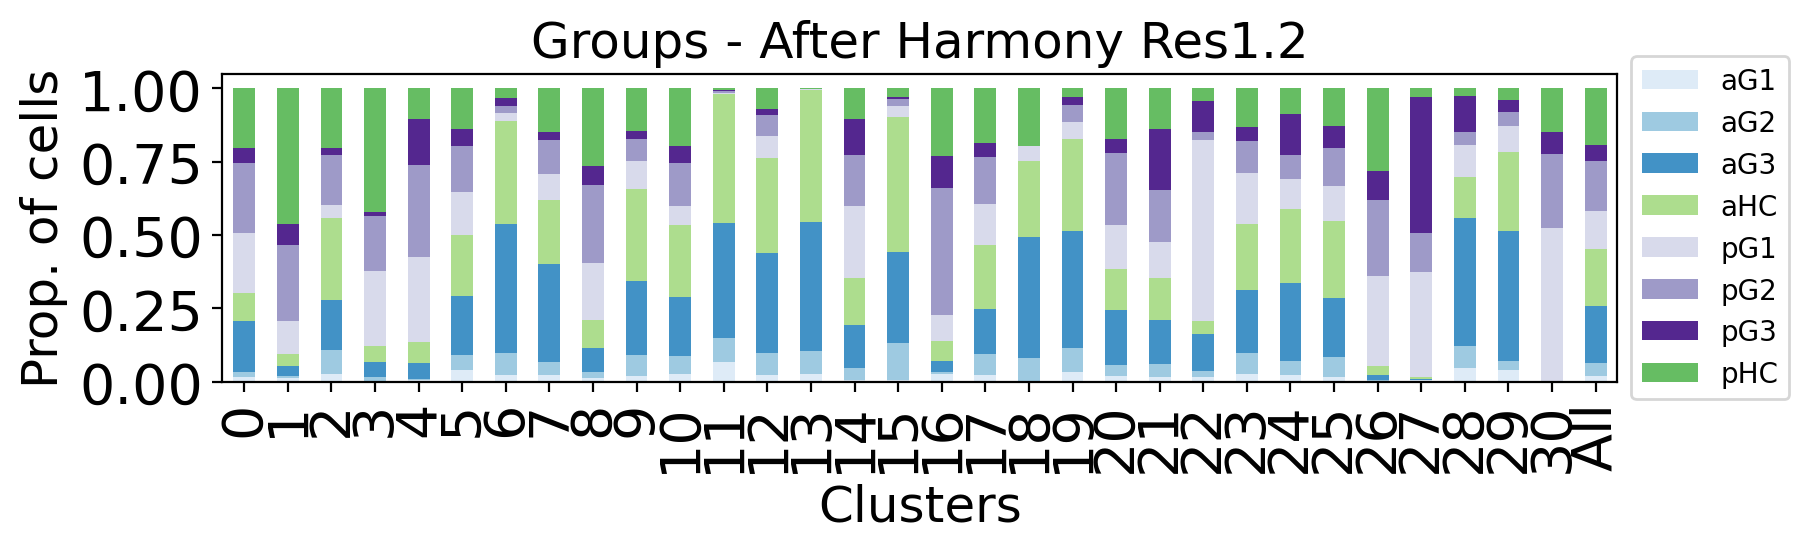

In [19]:
#-- proportion table
Groups_tab = pd.crosstab(index=har_corrected.obs['Res1_2_Harm'],  # Make a crosstab
                        columns=har_corrected.obs['Patient_groups'], margins=True)  

MyTab= Groups_tab.div(Groups_tab["All"], axis=0)
MyTab2 = MyTab.drop(columns="All")

MyTab2.plot(kind="bar",
            figsize=(9,2),
            stacked=True, 
            linewidth=1, 
            width=0.5, 
            fontsize=20, 
            color=col_patient_groups)


plt.title("Groups - After Harmony Res1.2", fontsize=18)
plt.ylabel("Prop. of cells", fontsize=18)
plt.xlabel("Clusters", fontsize=18)
plt.ylim=1.0

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.show()

In [ ]:
sc.settings.set_figure_params(dpi=300)  # set sufficiently high resolution for saving

Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK", #14-17
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #"IGHM","IGHD", #20-21
        "TNFRSF17", "MZB1",#'JCHAIN',#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", # 24-27
        'IFI44L','ISG15','IFI6', #28-30
        'HBB','HBA2'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(har_corrected, 
                   Genes, 
                   'Res1_2_Harm', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(8,8),
                    dot_max=1, 
                   dot_min=0.2) #, save='_Fig1c.pdf'
                    #,key='rank_genes_groups_filtered'

In [ ]:
har_corrected

In [ ]:
har_corrected

# save data 

In [ ]:
#--- Umap embbedings 
Emb =har_corrected.obsm.to_df()[['X_umap1', 'X_umap2']]
Emb.index =har_corrected.obs.index

#-- Meta Data 
meta =har_corrected.obs
Mat = meta.join(Emb)

Mat.to_csv('./Meta/Meta_paCov_Tsang_harm_V2_06032021.csv')
har_corrected.write('./H5AD/paCov_Tsang_harm_V2_06032021.h5ad')


In [10]:
har_corrected=sc.read('./H5AD/paCov_Tsang_harm_V2_06032021.h5ad')
har_corrected

AnnData object with n_obs × n_vars = 448304 × 1878
    obs: 'Cells', 'Samples', 'IDs', 'Names', 'Fig_ids', 'Groups', 'Ethnicity', 'Age_Months', 'runs_10X', 'Year', 'Patient_groups', 'SCs', 'n_genes', 'n_counts', 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification_global', 'hash_ID', 'INT_ID', 'BARCODE', 'NUM_SNPS', 'NUM_READS', 'DROPLET_TYPE', 'BEST_GUESS', 'BEST_LLK', 'NEXT_GUESS', 'NEXT_LLK', 'DIFF_LLK_BEST_NEXT', 'BEST_POSTERIOR', 'SNG_POSTERIOR', 'SNG_BEST_GUESS', 'SNG_BEST_LLK', 'SNG_NEXT_GUESS', 'SNG_NEXT_LLK', 'SNG_ONLY_POSTERIOR', 'DBL_BEST_GUESS', 'DBL_BEST_LLK', 'DIFF_LLK_SNG_DBL', 'NewBarcode', 'percent_mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res_0_5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sampl

/home/nehard/anaconda3/envs/scanpy1_6/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


categories: 0, 1, 2, etc.
var_group_labels: Mgk, Mono, DCs, etc.


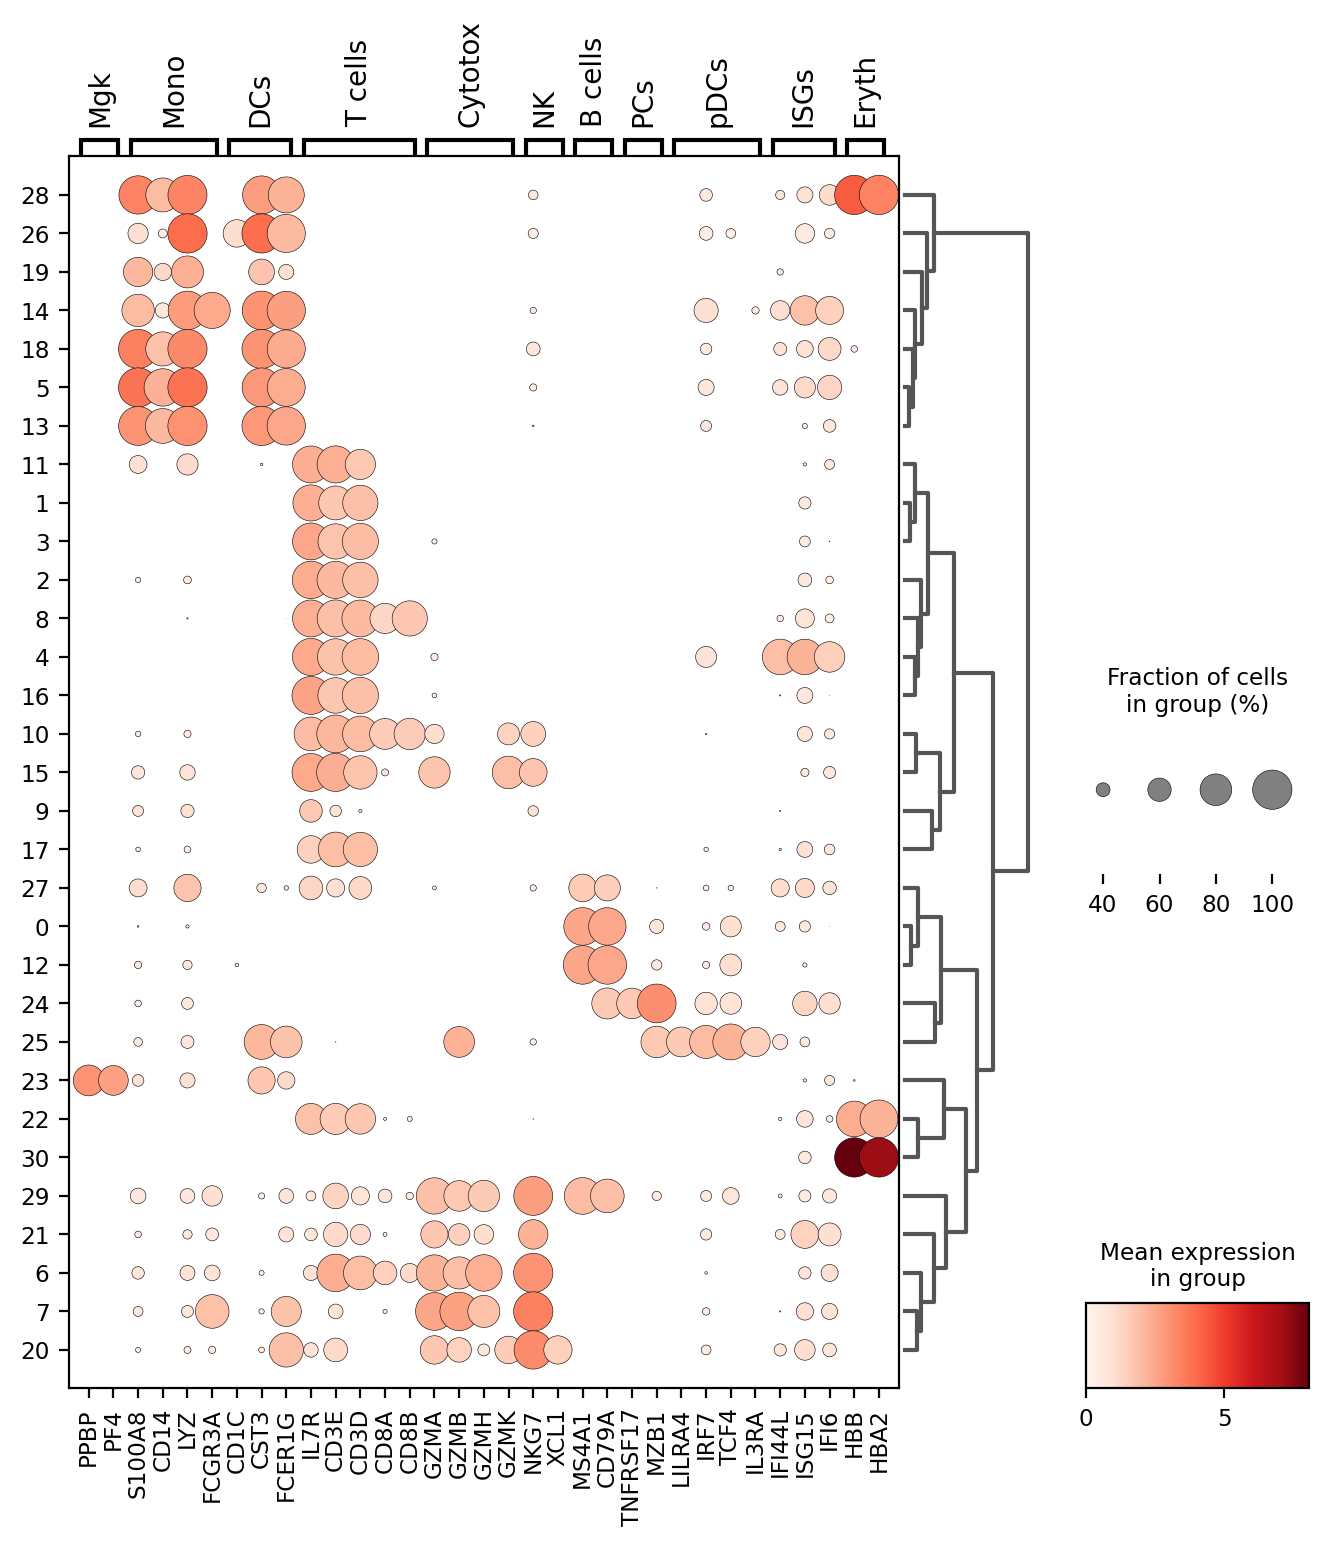

In [11]:
sc.settings.set_figure_params(dpi=300)  # set sufficiently high resolution for saving

Genes =["PPBP","PF4", #mgk: 0-1
        "S100A8","CD14","LYZ","FCGR3A",#2-5
        'CD1C',"CST3","FCER1G", #6-8
        "IL7R","CD3E","CD3D","CD8A","CD8B", #9-13
        "GZMA","GZMB","GZMH","GZMK", #14-17
        "NKG7",'XCL1', #18-19
        "MS4A1", "CD79A", #"IGHM","IGHD", #20-21
        "TNFRSF17", "MZB1",#'JCHAIN',#22-23
        'LILRA4',"IRF7","TCF4","IL3RA", # 24-27
        'IFI44L','ISG15','IFI6', #28-30
        'HBB','HBA2'] #31-32

matplotlib.style.use('default') 
ax = sc.pl.dotplot(har_corrected, 
                   Genes, 
                   'Res1_2_Harm', 
                   dendrogram=True,  
                   var_group_positions=[(0,1),(2,5), (6,8),(9,13),(14,17),(18,19),(20,21),(22,23),(24,27),(28,30),(31,32)],
                   var_group_labels=['Mgk','Mono', 'DCs','T cells','Cytotox','NK','B cells','PCs','pDCs','ISGs','Eryth'], 
                   figsize=(8,8),
                    dot_max=1, 
                   dot_min=0.2) #, save='_Fig1c.pdf'
                    #,key='rank_genes_groups_filtered'

In [12]:
har_corrected.obs.tail()

Cells Samples  IDs        Names Fig_ids Groups  \
TTTGTCAGTAAATGAC-16_4_aCov   nan     nan  nan  AA220907_HC    aHC3    aHC   
TTTGTCAGTACTCTCC-16_4_aCov   nan     nan  nan  IM000040_HC    aHC7    aHC   
TTTGTCAGTATAGTAG-16_4_aCov   nan     nan  nan  IM000040_HC    aHC7    aHC   
TTTGTCATCTGCGTAA-16_4_aCov   nan     nan  nan      SHD1_HC    aHC8    aHC   
TTTGTCATCTTAACCT-16_4_aCov   nan     nan  nan      SHD7_HC   aHC14    aHC   

                           Ethnicity  Age_Months runs_10X Year  ...  \
TTTGTCAGTAAATGAC-16_4_aCov       nan       384.0      nan  nan  ...   
TTTGTCAGTACTCTCC-16_4_aCov       nan       444.0      nan  nan  ...   
TTTGTCAGTATAGTAG-16_4_aCov       nan       444.0      nan  nan  ...   
TTTGTCATCTGCGTAA-16_4_aCov       nan       612.0      nan  nan  ...   
TTTGTCATCTTAACCT-16_4_aCov       nan       924.0      nan  nan  ...   

                                     ident     orig_ident  Concat_batch  \
TTTGTCAGTAAATGAC-16_4_aCov         CD4_Mem  SeuratProject          aCov   
TTTGTCAGTACTCTCC-16_4_aCov  Mono_Classical  SeuratProject          aCov   
TTTGTCAGTATAGTAG-16_4_aCov  Mono_Classical  SeuratProject          aCov   
TTTGTCATCTGCGTAA-16_4_aCov       NK_CD16hi  SeuratProject          aCov   
TTTGTCATCTTAACCT-16_4_aCov         B_Naive  SeuratProject          aCov   

                            Res1_2_BC     IDs_all  celltype_concat  Age_years  \
TTTGTCAGTAAATGAC-16_4_aCov         17        SHD1          CD4_Mem       32.0   
TTTGTCAGTACTCTCC-16_4_aCov          8  HGR0000392   Mono_Classical       37.0   
TTTGTCAGTATAGTAG-16_4_aCov          8  HGR0000392   Mono_Classical       37.0   
TTTGTCATCTGCGTAA-16_4_aCov         11  HGR0000134               NK       51.0   
TTTGTCATCTTAACCT-16_4_aCov          7  HGR0000051          B_Naive       77.0   

                            age_groups  Res1_2_Harm  Res1_Harm  
TTTGTCAGTAAATGAC-16_4_aCov      adults           15          7  
TTTGTCAGTACTCTCC-16_4_aCov      adults            5          5  
TTTGTCAGTATAGTAG-16_4_aCov      adults            5          5  
TTTGTCATCTGCGTAA-16_4_aCov      adults            7          3  
TTTGTCATCTTAACCT-16_4_aCov      adults            0          1  

[5 rows x 117 columns]

In [22]:
har_corrected.obs['Groups'].value_counts()

pCov    158779
aCov    115563
pHC      87256
aHC      86706
Name: Groups, dtype: int64

In [26]:
har_corrected.uns['Gouprs_colors']=col_groups

/home/nehard/anaconda3/envs/scanpy1_6/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


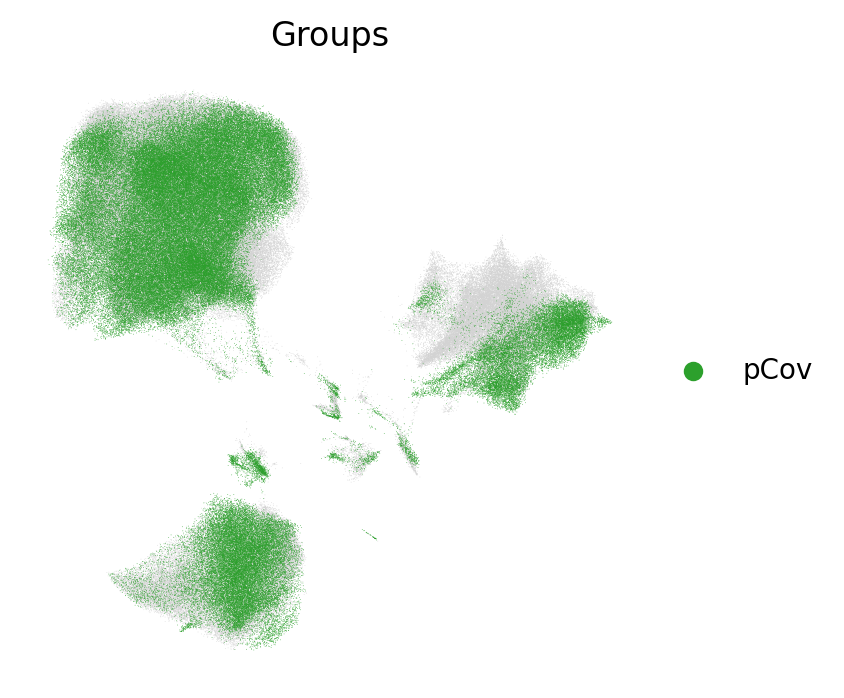

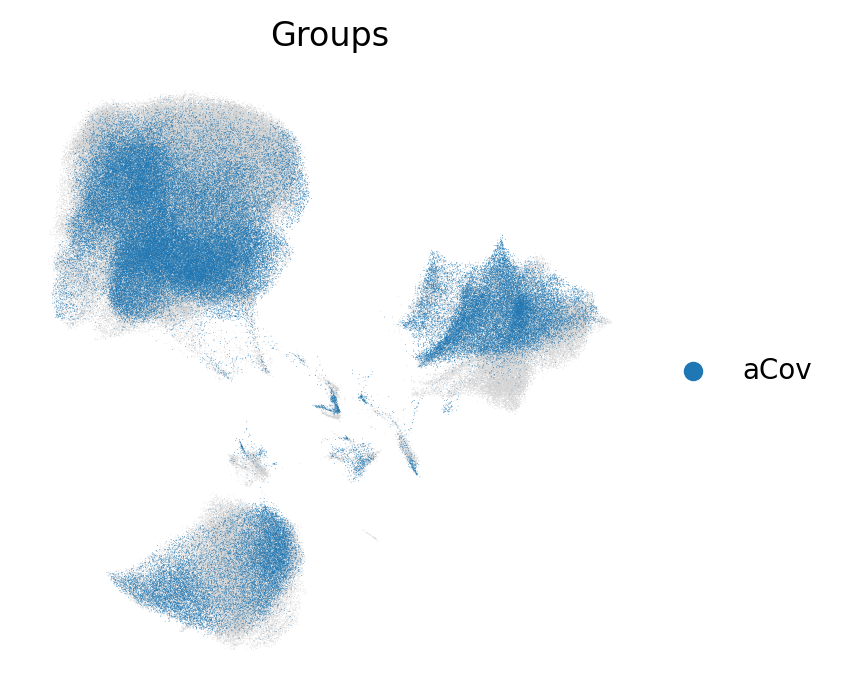

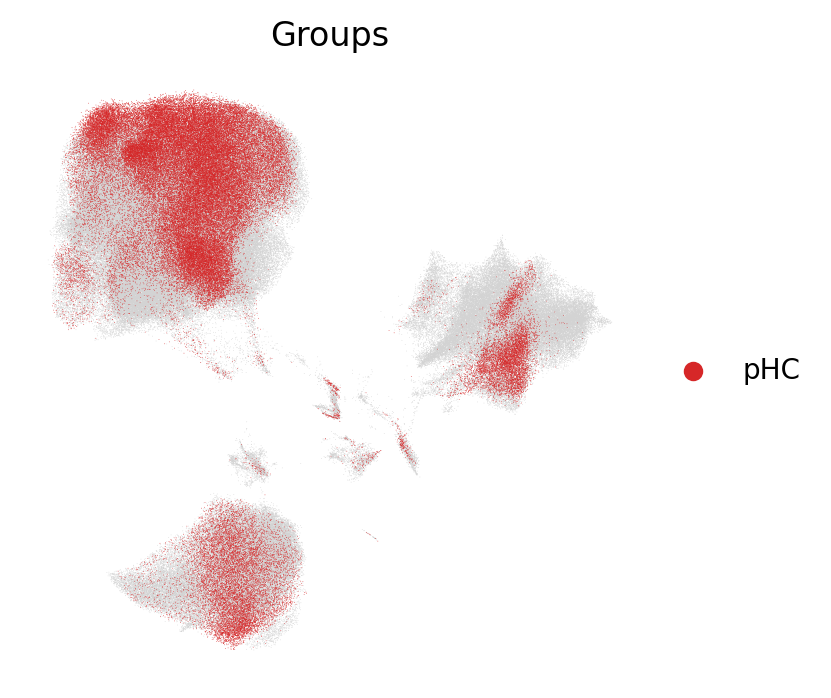

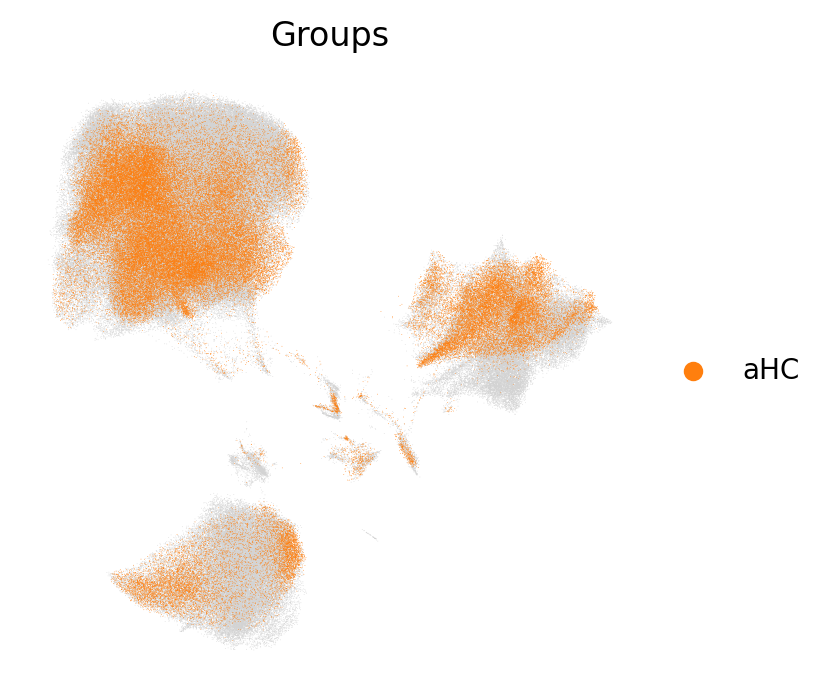

In [27]:
matplotlib.style.use('default')   
rcParams['figure.figsize'] = (4,4)

genes=['Groups']

sc.pl.umap(har_corrected, 
           color=genes,
           size=0.3, 
           color_map='OrRd',
           ncols=4,
           frameon=False,groups='pCov')
sc.pl.umap(har_corrected, 
           color=genes,
           size=0.3, 
           color_map='OrRd',
           ncols=4,
           frameon=False,groups='aCov')
sc.pl.umap(har_corrected, 
           color=genes,
           size=0.3, 
           color_map='OrRd',
           ncols=4,
           frameon=False,groups='pHC')
sc.pl.umap(har_corrected, 
           color=genes,
           size=0.3, 
           color_map='OrRd',
           ncols=4,
           frameon=False,groups='aHC')
